In [25]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

from sklearn.preprocessing import MinMaxScaler


fn = r'..\data\RawMLData.json'


def get_data(fn):

    with open(fn) as f:
        d = json.load(f)

    df = pd.DataFrame(d)


    numpycols = ['cP', 'HO','AO']

    for col in numpycols:
        df[col] = df[col].apply(lambda x: np.array(x, dtype = np.float32))


    cat_cols = ['Cohort', 'Device']
    for col in cat_cols:
        df[col] = df[col].astype('category')

    df['systolicP'] = df['InvP'].apply(lambda x: x[0]).astype(np.float32)
    df['meanP'] = df['InvP'].apply(lambda x: x[1]).astype(np.float32)
    df['diastolicP'] = df['InvP'].apply(lambda x: x[1]).astype(np.float32)

    print(df.info())


    return df

df = get_data(fn)
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cP          231 non-null    object  
 1   HO          231 non-null    object  
 2   AO          231 non-null    object  
 3   Device      231 non-null    category
 4   InvP        231 non-null    object  
 5   ID          231 non-null    object  
 6   Cohort      231 non-null    category
 7   systolicP   231 non-null    float32 
 8   meanP       231 non-null    float32 
 9   diastolicP  231 non-null    float32 
dtypes: category(2), float32(3), object(5)
memory usage: 12.6+ KB
None
                                                  cP  \
0  [208.89467, 205.89714, 203.43088, 200.66885, 1...   
1  [190.27066, 187.09329, 184.71638, 182.33327, 1...   
2  [218.12044, 215.04482, 212.68332, 210.1684, 20...   
3  [217.4349, 214.32487, 211.6698, 208.97379, 205...   
4  [143.55525, 136.84154, 133.02698, 128

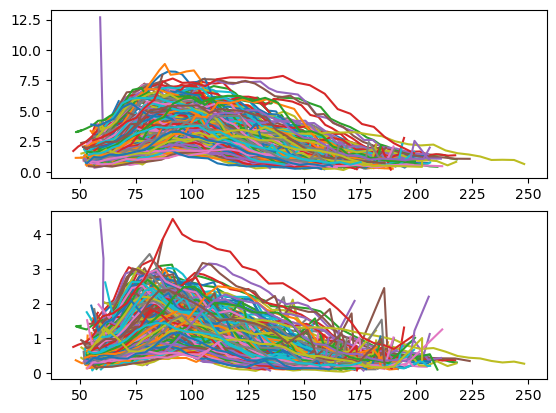

In [26]:
fig, ax = plt.subplots(2, 1)



for idx in df.index:
    ax[0].plot(df.loc[idx, 'cP'], df.loc[idx, 'HO'])
    ax[1].plot(df.loc[idx, 'cP'], df.loc[idx, 'AO'])





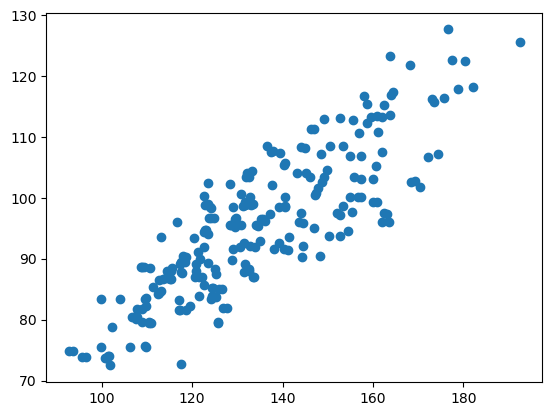

In [27]:
fig, ax = plt.subplots()

ax.scatter(df['systolicP'], df['diastolicP'])

In [28]:
df

,cP,HO,AO,Device,InvP,ID,Cohort,systolicP,meanP,diastolicP
0,"[208.89467, 205.89714, 203.43088, 200.66885, 1...","[1.1339884, 1.2789905, 1.2989467, 1.2953132, 1...","[0.3656616, 0.38252792, 0.36872083, 0.38372108...",ML,"[161, 113.5, 82.5]",c010510d,Training,161.000000,113.500000,113.500000
1,"[190.27066, 187.09329, 184.71638, 182.33327, 1...","[1.1225734, 1.2797437, 1.2361085, 1.4199806, 1...","[0.35000378, 0.3645, 0.38763604, 0.41575718, 0...",ML,"[162.1, 113.4, 82.7]",c010510d,Training,162.100006,113.400002,113.400002
2,"[218.12044, 215.04482, 212.68332, 210.1684, 20...","[1.0187457, 1.1084203, 1.3625389, 1.4147193, 1...","[0.3102993, 0.33327687, 0.3759376, 0.40023512,...",ML,"[155, 106.9, 80.3]",c010510d,Training,155.000000,106.900002,106.900002
3,"[217.4349, 214.32487, 211.6698, 208.97379, 205...","[1.3543037, 1.3219696, 1.3928195, 1.4442394, 1...","[0.3770759, 0.3851614, 0.36472023, 0.39717147,...",ML,"[157.3, 106.9, 79.3]",c010510d,Training,157.300003,106.900002,106.900002
4,"[143.55525, 136.84154, 133.02698, 128.74353, 1...","[0.46094194, 0.6634792, 0.6214445, 0.8304299, ...","[0.47818205, 0.23626477, 0.1948657, 0.26331067...",ML,"[129.6, 96.7, 72.6]",c010610d,Training,129.600006,96.699997,96.699997
...,...,...,...,...,...,...,...,...,...,...
226,"[164.643, 160.93803, 157.06279, 153.25061, 149...","[0.3608654, 0.43395364, 0.5622777, 0.541173, 0...","[0.26943228, 0.16113035, 0.13459988, 0.204315,...",OM,"[146.9, 95.1, 57.7]",c060908d,Testing,146.899994,95.099998,95.099998
227,"[165.47702, 163.5828, 162.61423, 159.4422, 155...","[2.1191719, 0.60006064, 0.59961486, 0.619585, ...","[0.90547144, 0.19662438, 0.16892475, 0.3329574...",OM,"[134.6, 95.4, 72.5]",c061608d,Testing,134.600006,95.400002,95.400002
228,"[202.65152, 202.66925, 190.08665, 185.06488, 1...","[0.8501995, 0.40529522, 0.47230497, 0.5143704,...","[0.38413742, 1.0109636, 0.19144912, 0.16630821...",OM,"[163.8, 113.7, 79.1]",c061708d,Testing,163.800003,113.699997,113.699997
229,"[175.2689, 170.64056, 166.15529, 161.63652, 15...","[0.7952086, 0.5835469, 0.78958446, 0.71068907,...","[0.307525, 0.22930028, 0.22049607, 0.24917187,...",OM,"[147.4, 100.9, 76.4]",c061708d,Testing,147.399994,100.900002,100.900002


In [29]:
df_flat = df.explode(['cP', 'HO', 'AO']).drop(columns = ['InvP',])
print(df_flat)

             cP        HO        AO Device        ID    Cohort   systolicP  \
0    208.894669  1.133988  0.365662     ML  c010510d  Training  161.000000   
0    205.897141  1.278991  0.382528     ML  c010510d  Training  161.000000   
0    203.430878  1.298947  0.368721     ML  c010510d  Training  161.000000   
0    200.668854  1.295313  0.383721     ML  c010510d  Training  161.000000   
0      197.5849  1.370378  0.395401     ML  c010510d  Training  161.000000   
..          ...       ...       ...    ...       ...       ...         ...   
230   67.488327  1.365474  0.430381     OM  c061908d   Testing  133.899994   
230     63.2757  1.415285  0.474303     OM  c061908d   Testing  133.899994   
230   59.722836  1.156165  0.403693     OM  c061908d   Testing  133.899994   
230    56.27636  1.213547  0.444616     OM  c061908d   Testing  133.899994   
230   53.214085  0.705481  0.287945     OM  c061908d   Testing  133.899994   

     meanP  diastolicP  
0    113.5       113.5  
0    113.5   

In [30]:
# FIT THE MODEL


scaler= MinMaxScaler()


x_vars = ['systolicP', 'meanP', 'diastolicP', 'cP']
y_vars = ['HO', 'AO']

all_vars = x_vars+y_vars

scaler.fit(df_flat[all_vars])

df_flat_normalized = df_flat.copy()
df_flat_normalized[all_vars] = scaler.transform(df_flat[all_vars])




I_train = df_flat_normalized['Cohort'] == 'Training'

x_train = df_flat_normalized.loc[I_train, x_vars]
y_train = df_flat_normalized.loc[I_train, y_vars]

x_test = df_flat_normalized.loc[~I_train, x_vars]
y_test = df_flat_normalized.loc[~I_train, y_vars]


from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=10,n_jobs=-1,verbose =0)
model.fit(x_train, y_train)

y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)
#plot_everything(y_train, y_test, y_predict_train, y_predict_test)

KeyError: '__reduce_cython__'

In [ ]:
x_train

,systolicP,meanP,diastolicP,cP
0,0.684369,0.742754,0.742754,0.804583
0,0.684369,0.742754,0.742754,0.789675
0,0.684369,0.742754,0.742754,0.777409
0,0.684369,0.742754,0.742754,0.763672
0,0.684369,0.742754,0.742754,0.748334
...,...,...,...,...
183,0.403808,0.478261,0.478261,0.115022
183,0.403808,0.478261,0.478261,0.097006
183,0.403808,0.478261,0.478261,0.079320
183,0.403808,0.478261,0.478261,0.061199
